# Programming for Data Analytics - Project Dec 13th 2019

Reporting of my teams responses is proving to be an item the analysts working on reports from BFO are unable to generate.

In technical support, there are tools being used by other companies that allow tickets to be created from either the customer side or from the technical support side when customers call the support lines or initiate a chat from the support pages in our website.

Technical support is broken up into 3 distinct levels, each one an order of magnitude technically more competent with greater resources available to them and usually a greater Education, Exposure and Experience.

From the Level 3 or expert level technical support managers perspective a very important item, and one that should be shard vast and wide within the organisation is the time delay between a case coming into the Level 3 Support Queue and the time a response is provided to the Level 2 agent escalating the case or the customer directly. This time is a bell weather of the experts teams response time, without taking into account any other items that may affect the teams responses for instance team moral or the number of team members on annual leave etc.

Within the environment of Salesforce that is not designed as a technical support platform but has been adopted to be just this, there are more fields than are required, but we only concern ourselves with populating the fields that are necessary to progress the case. For instance a case cannot be escalated if the case doesn’t have a customer email or phone number, nor can it be escalated if there is no product assigned or symptom selected. These are arbitrary but can be omitted if there weren’t checks and balances put in place.

A brief outline of how technical support and the tools that are used has provided the backdrop to the issue at hand.
The tools we use log all the data within a database and displays all of the data in related fields through a web browser. From the L3 point of view it is a webpage with fields to be entered or completed and then once an item is changed, for instance the status of the case from in progress to “answer provided to customer” then the case changes stage. This change is logged in the background under case stages. Also in case stages there are time stamps for each change and this information is key to getting to figure out my teams SLA (Service Level Agreement). We commit to less than 24 hours but for the most part the SLA comes in at just a few hours. However this is only known by taking a random sample and individually assessing these cases.
A number of items also to be aware of are the following;
1. Public holidays and weekends also need to be taken into account
2. A case can be escalated and de-escalated to the L3 team many times so care should be taken computing between these.
3. Cases are escalated into a general L3 queue with the L3 team members operating in 3 different time zones accepting these cases.
4. An item known as EIC (escalation internal comment) must accompany a case as it is escalated and also in response from the L3 they too must provide a response in the form of an EIC.

All of the data that is gathered and logged by each member of the technical support community in the company I work for, has dashboards available so managers can quickly identify any issues and allow other interested employees access to see the team results. For the most part this is sufficient for senior management and others. But for me as the manager of a team of individuals, I need more granular information, preferably in graphical format in order to better serve my team and ultimately the company I work for.




I hope this makes sense as there is a great many items to consider. Thankfully there are real life reports from the tool we can base any simulated or synthesised data on, and fingers crossed the results will be applicable to my managerial
Function.


The items that are of vital importance are:
1. Case Reference Number or ID.
2. Case Stage
3. Time and date of Stage Change
4. Time length case rested in each case stage
5. Person or queue owning the Case before each stage is complete
6. Has the case been truly completed?
7. Has the case been completely resolved?
8. Has the customer been surveyed?

# Case Reference Number or ID

The case reference number is a unique 8 digit number that is automatically created when a case is created. Cases are created in a  number of ways, for instance it might be a technical support call answered by a member of the Customer Care Team, or it might be a sales person following up with a potential sales lead or it could even be the Salesforce platform automatically responding to a customer who may have completed an online web form that enters into the salesforce platform a case number is assigned, the details are extracted from the web form submission and the case reference number is emailed back to the customer in the blink of an eye. Each case may be unique but there is an order to the case numbering. For instance each case created is just incremented by 1 from the previous case number. 

In order to synthesize this data we should be able to simply generate 8 digit numbers to begin with. And then for the sample we aim to work with, we just need to increment each time to give us the sample number of cases. Or indeed to be more realistic we could take a random set of geerated case reference numbers as this wouuld be more realistic. 


In [3]:
# Tastefully taken from the following link on 10 Dec 2019:
# https://stackoverflow.com/questions/2673385/how-to-generate-random-number-with-the-specific-length-in-python
from random import randint # import the function random integer

def random_with_N_digits(n):
    range_start = 10**(n-1)
    range_end = (10**n)-1
    return randint(range_start, range_end) # return a random integer with the specific start and end range values
case = random_with_N_digits(8) # generte a case number from the function with 8 digits
case # Lets just output the initial case created so we know we are on the right track

24454744

In [4]:
case+1 # just a quick test to ensure we are calculating correctly- just add 1 to the previous case created.

24454745

In [5]:
import numpy as np # import numpy as we will be requiring this
import pandas as pd # also import pandas as we will also be requiring Pandas
import random # as we will also be requiring the use of this

# let the array case equal to a numpy, a range, with the starting point equal to the case number we have aready created
# we will want 100 cases to begin with witha step of 1. 
array_case = np.arange(start=case, stop=case+100, step=1)
# We will also want the array of cases to be a dataframe using the following:
# = pandas DataFrame of the array_case with a column titled Case Ref.
array_case_dataframe = pd.DataFrame(array_case, columns=['Case Ref'])
# we will output the array dataframe so we can see that we are on the right track
array_case_dataframe

,Case Ref
0,24454744
1,24454745
2,24454746
3,24454747
4,24454748
5,24454749
6,24454750
7,24454751
8,24454752
9,24454753


In [6]:
len(array_case) # just checking that the length of the array is as expected

100


So that covers the case references for us, now we need to concentrate on the person or queue that may be accepting or working on the case. 
To do this and without divulging any of my team members, we will call them different names of the alphabet:


In [7]:
# the expert team names
experts = ["Aidan", "Brendan", "Conor", "Declan", "Eoghan", "Freddie", "Graham", "Henry", "Ian"]
# lets just print to screen so we know we are also doing good.
experts 

['Aidan',
 'Brendan',
 'Conor',
 'Declan',
 'Eoghan',
 'Freddie',
 'Graham',
 'Henry',
 'Ian']

In [8]:
len(experts) # lets check the length of experts in the array

9

In [9]:
# Now we need to randomize this array somehow

# let the "array experts"  equal to a random choice of the "experts set" with 100 values
array_experts = random.choices(experts, k=100)
#let the "array experts dataframe" equal to a pandas dataframe of "array experts (from previous line) and the column 
# designated "Experts"
array_experts_dataframe = pd.DataFrame(array_experts, columns=['Expert'])
#output to screenthe dataframe
array_experts_dataframe

,Expert
0,Ian
1,Graham
2,Henry
3,Henry
4,Henry
5,Conor
6,Eoghan
7,Brendan
8,Conor
9,Graham


In [10]:
len(array_experts_dataframe) # just a check on the length again

100

We need to concatenate both the arrays now to be able to deliver the array we wish to synthesize from extractions:

In [11]:
# For saome reason I am unable to concatenate the 2 X arrays using np so I am going to now try data frames in Panda
# np.concatenate((array_case,array_experts),axis=1)

pd.concat([array_case_dataframe, array_experts_dataframe], axis=1) #names=['Series name', 'Row ID'])

,Case Ref,Expert
0,24454744,Ian
1,24454745,Graham
2,24454746,Henry
3,24454747,Henry
4,24454748,Henry
5,24454749,Conor
6,24454750,Eoghan
7,24454751,Brendan
8,24454752,Conor
9,24454753,Graham


So now we have 2 columns and we know how to create a data frame with these 100 values and 2 columns, now it is time to dd more. So what values are important??? Specifically time and date! Lets get to that now.

In [12]:
# we need to import the following as we will be using them
import datetime as dt
import pandas as pd
import numpy as np
import random as rd
import random
from datetime import date 

In [13]:
dt = date(2019, 1, 1) # set the date and time (time defaults to 00)
dt.strftime('%D %I:%M') # set the date and time to a string

'01/01/19 12:00'

In [14]:
# initial date is 01 Jan 2019, so we need to generate a number of dates past this
start_date = date.today().replace(day=1, month=1).toordinal()
end_date = date.today().toordinal()

In [15]:
# in order to create a random array of dates
# taken from this website and ammended: https://stackoverflow.com/questions/50165501/generate-random-list-of-timestamps-in-python


import time
random_day1 = [] #dates = []
random_day2 = [] #dates = []
random_day3 = [] #dates = []
def randomDate(start, end):
    frmt = '%d-%m-%Y' #%H:%M:%S'
    stime = time.mktime(time.strptime(start, frmt))
    etime = time.mktime(time.strptime(end, frmt))
    ptime = stime + random.random() * (etime - stime)
    dt = date.fromtimestamp(time.mktime(time.localtime(ptime)))
    return dt

In [16]:
for i in range(0 , 100): # for 100 iterations run the following lines of code - just generate3 sets of 100 dates
    # Generating the random dates was not an issue for me.
    # However I found it a real struggle to identify the middle date between the 
    # earliest occurring date, and the last occurring date. So much time was lost here
    # I had to just rethink it. So this is why I came up with creating 3 different 
    # time frames and generating random dates within those 3 random dates. Seems simple
    # and I have been asking myself why didn;t I do it this way to begin? But I wanted it to be truly
    # (or as truly random as it can be with pseudo random numbers) random.
    
    # create the case opening dates X 100
    random_day1.append(randomDate("01-01-2019", "01-04-2019"))
    # create the middle dates X 100
    random_day2.append(randomDate("01-04-2019", "01-08-2019"))
    # create the case closing dates X 100
    random_day3.append(randomDate("01-08-2019", "15-12-2019"))
    
array_random_day1_dataframe = pd.DataFrame(random_day1, columns=['Creation Date'])
array_random_day2_dataframe = pd.DataFrame(random_day2, columns=['InProgress Date'])
array_random_day3_dataframe = pd.DataFrame(random_day3, columns=['Closed Date'])
pd.concat([array_random_day1_dataframe, array_random_day2_dataframe, array_random_day3_dataframe], axis=1)


,Creation Date,InProgress Date,Closed Date
0,2019-03-19,2019-05-24,2019-11-27
1,2019-01-14,2019-04-02,2019-11-03
2,2019-01-31,2019-05-01,2019-09-20
3,2019-01-31,2019-05-05,2019-08-09
4,2019-02-23,2019-07-10,2019-09-25
5,2019-02-16,2019-07-14,2019-12-13
6,2019-01-22,2019-05-07,2019-08-02
7,2019-02-01,2019-07-09,2019-11-10
8,2019-01-09,2019-04-29,2019-10-29
9,2019-01-18,2019-06-21,2019-09-15


In [17]:
# Now lets try and concatenate both the random case and expert data and the dates data:

pd.concat([array_case_dataframe, array_experts_dataframe, array_random_day1_dataframe, array_random_day2_dataframe, array_random_day3_dataframe], axis=1)
#pd.concat([array_random_day1_dataframe, array_random_day2_dataframe, array_random_day3_dataframe], axis=1)

,Case Ref,Expert,Creation Date,InProgress Date,Closed Date
0,24454744,Ian,2019-03-19,2019-05-24,2019-11-27
1,24454745,Graham,2019-01-14,2019-04-02,2019-11-03
2,24454746,Henry,2019-01-31,2019-05-01,2019-09-20
3,24454747,Henry,2019-01-31,2019-05-05,2019-08-09
4,24454748,Henry,2019-02-23,2019-07-10,2019-09-25
5,24454749,Conor,2019-02-16,2019-07-14,2019-12-13
6,24454750,Eoghan,2019-01-22,2019-05-07,2019-08-02
7,24454751,Brendan,2019-02-01,2019-07-09,2019-11-10
8,24454752,Conor,2019-01-09,2019-04-29,2019-10-29
9,24454753,Graham,2019-01-18,2019-06-21,2019-09-15


To be a more realistic and full data set there are a further 3 parameters I would like to add here. ALl generated using random data, we should include items such as "is the case closed", "has the customer been surveyed" and simply "has the issue been resolved?" 


In [18]:
# setting up the array with random answers, yes or no.
yes_or_no = ["Yes", "No"]

# let the "array experts"  equal to a random choice of the "experts set" with 100 values
array_closed = random.choices(yes_or_no, k=100)
array_surveyed = random.choices(yes_or_no, k=100)
array_answered = random.choices(yes_or_no, k=100)

#let the "array experts dataframe" equal to a pandas dataframe of "array experts (from previous line) and the column 
# designated "Experts"
array_closed_dataframe = pd.DataFrame(array_closed, columns=['Closed?'])
array_surveyed_dataframe = pd.DataFrame(array_surveyed, columns=['Surveyed?'])
array_answered_dataframe = pd.DataFrame(array_answered, columns=['Answered?'])

#output to screen the dataframe
array_closed_dataframe

,Closed?
0,Yes
1,Yes
2,No
3,No
4,Yes
5,No
6,No
7,Yes
8,No
9,No


In [19]:
# Lets concatenate all the dataframes:

master_dataframe = pd.concat([array_case_dataframe, array_experts_dataframe, array_random_day1_dataframe, array_random_day2_dataframe, array_random_day3_dataframe, array_answered_dataframe, array_closed_dataframe, array_surveyed_dataframe], axis=1)

master_dataframe

,Case Ref,Expert,Creation Date,InProgress Date,Closed Date,Answered?,Closed?,Surveyed?
0,24454744,Ian,2019-03-19,2019-05-24,2019-11-27,Yes,Yes,No
1,24454745,Graham,2019-01-14,2019-04-02,2019-11-03,Yes,Yes,Yes
2,24454746,Henry,2019-01-31,2019-05-01,2019-09-20,Yes,No,No
3,24454747,Henry,2019-01-31,2019-05-05,2019-08-09,Yes,No,Yes
4,24454748,Henry,2019-02-23,2019-07-10,2019-09-25,No,Yes,Yes
5,24454749,Conor,2019-02-16,2019-07-14,2019-12-13,No,No,No
6,24454750,Eoghan,2019-01-22,2019-05-07,2019-08-02,Yes,No,No
7,24454751,Brendan,2019-02-01,2019-07-09,2019-11-10,Yes,Yes,No
8,24454752,Conor,2019-01-09,2019-04-29,2019-10-29,Yes,No,No
9,24454753,Graham,2019-01-18,2019-06-21,2019-09-15,No,No,Yes


# Analysing the Data

The data thus far consists of a case reference and the expert working on the case. Alongside this we have also created random dates that will act as the case opening date, case closing date and the date the case was actually worked on, all within 2019. TO add a depth to the data we have also included 3 other random pieces of information, namely yes or no answers to the following 3 questions: 
1. Has the case been truly closed?
2. Has the customer been surveyed
3. Has the issue been resolved?
There are 100 sets of data contained within 100 rows with 8 columns. There is also a column numbering the rows, much like what we would see in Excel, but for the most part this can be ignored.

Managing the team under me, first item I want to check is how busy each of the team members were in relation to each other. So from a simplistic approach, very quickly we can identify who the busiest member is using the describe function:


In [20]:
array_experts_dataframe.describe() # top level description of the array experts dataframe

,Expert
count,100
unique,9
top,Graham
freq,14


The busiest member of the team is identified above as the "Top" player. Additionally we can see the number of cases the hardest worker worked on noted under frequency. 

If we were to apply the same "describe" function to the cmplete 8 columns and 100 lines of data, we will get teh top line figures of the dataset:

In [21]:
master_dataframe.describe(include='all')

,Case Ref,Expert,Creation Date,InProgress Date,Closed Date,Answered?,Closed?,Surveyed?
count,1.000000e+02,100,100,100,100,100,100,100
unique,NaN,9,59,65,66,2,2,2
top,NaN,Graham,2019-01-09,2019-06-08,2019-10-30,Yes,No,No
freq,NaN,14,5,5,4,52,51,51
mean,2.445479e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,2.901149e+01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2.445474e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,2.445477e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,2.445479e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,2.445482e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Again, the busiest member of the Expert team is the "top" player as identified above. 

In [22]:
# in order to use the seaborn package we need to import it here
import matplotlib.pyplot as plt
#df.hist(column='Expert')

df = array_experts_dataframe['Expert']

df.hist()

#random_day3 - random_day1
# closed_date - creation_date

#import seaborn as sns
#sns.pairplot(array_experts_dataframe, hue='Expert')

In [ ]:
#array_experts_dataframe.loc[:, 'Expert'] == 'Ian' # boolean selection i.e. use labels to look at all rows (:) check if SPecies is Setosa and if it is return True otherwise return false

Beingthe manager of the team, I am certainly interested inseeing how m newest recruit is handling cases and I would like to see how busy Ian is. So lets look at that data now: 

In [23]:
# wouldn't it be interesting to see which cases Ian was dealing with? Lets look at those:
array_experts_dataframe[array_experts_dataframe.loc[:, 'Expert'] == 'Ian']

,Expert
0,Ian
16,Ian
17,Ian
24,Ian
39,Ian
66,Ian
77,Ian
91,Ian


Better again, why not just analyze all Ian's cases:

In [25]:
master_dataframe[array_experts_dataframe.loc[:, 'Expert'] == 'Ian']

,Case Ref,Expert,Creation Date,InProgress Date,Closed Date,Answered?,Closed?,Surveyed?
0,24454744,Ian,2019-03-19,2019-05-24,2019-11-27,Yes,Yes,No
16,24454760,Ian,2019-01-01,2019-06-05,2019-11-15,Yes,No,No
17,24454761,Ian,2019-02-22,2019-06-25,2019-11-05,No,Yes,Yes
24,24454768,Ian,2019-01-14,2019-06-13,2019-12-12,Yes,No,Yes
39,24454783,Ian,2019-01-12,2019-07-19,2019-08-24,Yes,Yes,Yes
66,24454810,Ian,2019-02-17,2019-05-20,2019-10-19,Yes,Yes,Yes
77,24454821,Ian,2019-03-29,2019-07-09,2019-10-06,No,Yes,Yes
91,24454835,Ian,2019-03-25,2019-06-23,2019-10-30,Yes,No,No


If Aidan was my top performing member, it might be a good time to compare the two together. So lets also ook at Aidan's:
~

In [27]:
master_dataframe[array_experts_dataframe.loc[:, 'Expert'] == 'Aidan']

,Case Ref,Expert,Creation Date,InProgress Date,Closed Date,Answered?,Closed?,Surveyed?
12,24454756,Aidan,2019-02-24,2019-06-04,2019-11-16,No,Yes,No
15,24454759,Aidan,2019-01-09,2019-06-08,2019-08-02,No,Yes,Yes
25,24454769,Aidan,2019-03-11,2019-04-17,2019-11-17,Yes,No,No
43,24454787,Aidan,2019-02-15,2019-06-08,2019-08-11,Yes,No,Yes
55,24454799,Aidan,2019-02-04,2019-05-28,2019-10-19,Yes,No,Yes
57,24454801,Aidan,2019-02-02,2019-06-23,2019-11-22,No,Yes,No
60,24454804,Aidan,2019-01-25,2019-06-11,2019-09-18,No,Yes,Yes
63,24454807,Aidan,2019-01-19,2019-04-19,2019-08-12,No,Yes,Yes
69,24454813,Aidan,2019-03-04,2019-06-02,2019-10-17,Yes,No,No
87,24454831,Aidan,2019-02-19,2019-07-09,2019-12-09,Yes,Yes,Yes


We can quite quickly see the differences in the number of cases handled by the 2 team members. We could perform sme further data analysis on the times cases were sitting in particular states before they were resolved, or indeed we could monitor the resolved status of all the cases to see what percentage are actually resolved per user. 

# Summary Statistics

In [31]:
master_dataframe.head() # head of the dataframe

,Case Ref,Expert,Creation Date,InProgress Date,Closed Date,Answered?,Closed?,Surveyed?
0,24454744,Ian,2019-03-19,2019-05-24,2019-11-27,Yes,Yes,No
1,24454745,Graham,2019-01-14,2019-04-02,2019-11-03,Yes,Yes,Yes
2,24454746,Henry,2019-01-31,2019-05-01,2019-09-20,Yes,No,No
3,24454747,Henry,2019-01-31,2019-05-05,2019-08-09,Yes,No,Yes
4,24454748,Henry,2019-02-23,2019-07-10,2019-09-25,No,Yes,Yes


In [32]:
master_dataframe.tail() # tail of the dataframe

,Case Ref,Expert,Creation Date,InProgress Date,Closed Date,Answered?,Closed?,Surveyed?
95,24454839,Freddie,2019-03-08,2019-06-07,2019-08-02,Yes,No,No
96,24454840,Henry,2019-02-25,2019-07-25,2019-10-20,Yes,No,Yes
97,24454841,Aidan,2019-03-16,2019-07-18,2019-11-08,No,No,Yes
98,24454842,Declan,2019-02-13,2019-07-25,2019-12-09,No,Yes,Yes
99,24454843,Declan,2019-01-26,2019-06-17,2019-12-08,No,No,Yes


# Plots



In [34]:
import seaborn as sns

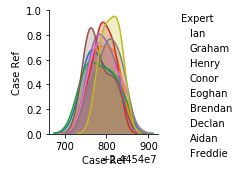

In [49]:
sns.pairplot(master_dataframe, hue='Expert')

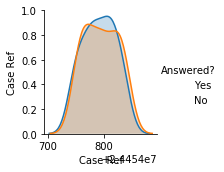

In [43]:
sns.pairplot(master_dataframe, hue='Answered?')

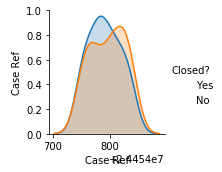

In [45]:
sns.pairplot(master_dataframe, hue='Closed?')

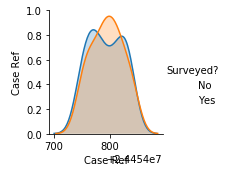

In [46]:
sns.pairplot(master_dataframe, hue='Surveyed?')

Unfortunately this is as far as I have come at 23:26 on the 19th December 2019. There is a great deal more to do reagardng the analysis but I have run out of time.